In [20]:
import pandas as pd
import numpy as np
jobs = pd.read_csv("AIxDesignjobs_Indeed_with categorization1.csv")

In [21]:
jobs.head(5)

,title,company,location,country,working model,salary,summary
0,Senior Data Analytics & Automation Specialist,Abbott Laboratories,Abbott Park,USA,onsite,NaN,Building advanced technical analytics skill in...
1,Senior Data Scientist,"TeraRecon, Inc",Acton,USA,onsite,NaN,The location of the position is flexible withi...
2,Game QA Tester,Penumbra US,Alameda,USA,onsite,NaN,Work under the direction of the Game QA Lead t...
3,UX Designer,Abbott Laboratories,Alameda,USA,onsite,NaN,"Interaction Design - Sketching, concept creati..."
4,USDA-ARS SCINet Postdoctoral Fellowship in Pre...,U.S. Department of Agriculture (USDA),Albany,USA,onsite,NaN,Experience in 3D structural modeling of synthe...


In [3]:
jobs.shape

(12917, 7)

In [4]:
#removing duplicates
jobs = jobs.drop_duplicates()
jobs.reset_index(drop=True, inplace=True)
jobs.shape

(9985, 7)

In [5]:
jobs['salary'].describe()

count                201
unique               166
top       £50,000 a year
freq                   4
Name: salary, dtype: object

In [6]:
jobs['salary'].unique()

array([nan, '£50,000 a year', '£20,000 - £24,000 a year',
       '₹18,00,000 - ₹27,00,000 a year', '₹30,00,000 - ₹40,00,000 a year',
       '₹14,00,000 - ₹16,00,000 a year', '₹4,36,426 - ₹10,07,214 a year',
       '₹2,13,909 - ₹6,00,000 a year', '₹15,000 a month',
       '₹15,000 - ₹25,000 a month', '₹3,00,000 a year',
       '₹3,00,000 - ₹8,00,000 a year', '₹4,50,000 - ₹5,50,000 a year',
       '₹2,37,222 - ₹7,06,420 a year', '₹1,75,000 - ₹7,00,000 a year',
       '₹10,000 - ₹15,000 a month', '₹2,14,075 - ₹6,00,000 a year',
       '₹3,50,000 - ₹5,00,000 a year', '₹15,000 - ₹20,000 a month',
       '₹20,000 - ₹40,000 a month', '₹20,000 - ₹35,000 a month',
       '₹1,75,000 - ₹3,00,000 a year', '₹5,00,000 - ₹12,00,000 a year',
       '₹15,00,000 - ₹20,00,000 a year', '₹20,00,000 - ₹30,00,000 a year',
       '₹10,00,000 - ₹22,00,000 a year', '₹7,00,000 a year',
       '₹30,000 - ₹35,000 a month', '₹18,000 - ₹20,000 a month',
       '₹1,50,000 a month', '₹30,000 a month',
       '₹6,00,00

In [7]:
# Cleaning the salary information to make parsing easier 
#remove '\n', '$', "£", '₹' and ','
jobs['salary'] = jobs['salary'].str.replace('\n','')
jobs['salary'] = jobs['salary'].str.replace(',','')
jobs['salary'] = jobs['salary'].str.replace('$','')
jobs['salary'] = jobs['salary'].str.replace('£','')
jobs['salary'] = jobs['salary'].str.replace('₹','')

C:\Users\Karthika Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [8]:
jobs['salary_period'] = np.nan

#if the salary contains information on time period, save that time
#period string in the separate salary_period column
jobs.loc[jobs['salary'].str.contains('year', na=False), 'salary_period']= 'year'
jobs.loc[jobs['salary'].str.contains('month', na=False), 'salary_period']= 'month'
jobs.loc[jobs['salary'].str.contains('week', na=False), 'salary_period'] = 'week'
jobs.loc[jobs['salary'].str.contains('day', na=False), 'salary_period'] = 'day'
jobs.loc[jobs['salary'].str.contains('hour', na=False), 'salary_period'] = 'hour'

In [9]:
#separating out data based on whether contains hour, day, week, month, year
year_salaries = jobs[jobs['salary'].str.contains('year', na=False)]
month_salaries = jobs[jobs['salary'].str.contains('month', na=False)]
week_salaries = jobs[jobs['salary'].str.contains('week', na=False)]
day_salaries = jobs[jobs['salary'].str.contains('day', na=False)]
hour_salaries = jobs[jobs['salary'].str.contains('hour', na=False)]

In [10]:
# removing string values('a year', 'a week', etc. from salary data frame)
year_salaries.loc['salary'] = year_salaries['salary'].str.replace('a year','')
month_salaries.loc['salary'] = month_salaries['salary'].str.replace('a month','')
week_salaries.loc['salary'] = week_salaries['salary'].str.replace('a week','')
day_salaries.loc['salary'] = day_salaries['salary'].str.replace('a day','')
hour_salaries.loc['salary'] = hour_salaries['salary'].str.replace('an hour','')

C:\Users\Karthika Preethi\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [11]:
def split_sal(i):
    try:
                splt = i.split(' — ',1)
                first = float(splt[0])
                second = float(splt[1])
                return (first + second)/2
    except:
                return float(i)
   

In [ ]:
year_salaries.loc['salary'] = year_salaries['salary'].apply(split_sal)
month_salaries.loc['salary'] = month_salaries['salary'].apply(split_sal)
month_salaries.loc['salary'] = month_salaries['salary'] * 12
week_salaries.loc['salary'] = week_salaries['salary'].apply(split_sal)
week_salaries.loc['salary'] = week_salaries['salary'] * 52
day_salaries.loc['salary'] = day_salaries['salary'].apply(split_sal)
day_salaries.loc['salary'] = day_salaries['salary'] * 260
hour_salaries.loc['salary'] = hour_salaries['salary'].apply(split_sal)
hour_salaries.loc['salary'] = hour_salaries['salary'] * 2080

In [12]:
#Percentage of missing salary columns
num_rows = len(jobs.index)
low_information_cols = [] 

for col in jobs.columns:
    cnts = jobs[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

salary: 97.98698%
NaN                       9784
50000 a year                 4
800000 a year                4
40000 a year                 4
55000 a year                 4
                          ... 
100000 - 120000 a year       1
32000 - 38000 a year         1
35000 - 55000 a year         1
21500 - 23000 a year         1
20000 - 25000 a month        1
Name: salary, Length: 167, dtype: int64

salary_period: 97.98698%
NaN      9784
year      163
month      25
day         8
hour        5
Name: salary_period, dtype: int64



In [13]:
combined_salaries = pd.concat([year_salaries, month_salaries, week_salaries, day_salaries, hour_salaries], axis=0)
jobs = pd.concat([jobs, combined_salaries], axis=0)
jobs.head(10)

,title,company,location,country,working model,salary,summary,salary_period
0,Senior Data Analytics & Automation Specialist,Abbott Laboratories,Abbott Park,USA,onsite,NaN,Building advanced technical analytics skill in...,NaN
1,Senior Data Scientist,"TeraRecon, Inc",Acton,USA,onsite,NaN,The location of the position is flexible withi...,NaN
2,Game QA Tester,Penumbra US,Alameda,USA,onsite,NaN,Work under the direction of the Game QA Lead t...,NaN
3,UX Designer,Abbott Laboratories,Alameda,USA,onsite,NaN,"Interaction Design - Sketching, concept creati...",NaN
4,USDA-ARS SCINet Postdoctoral Fellowship in Pre...,U.S. Department of Agriculture (USDA),Albany,USA,onsite,NaN,Experience in 3D structural modeling of synthe...,NaN
5,Associate Camera Designer,Blizzard Entertainment,New York,USA,onsite,NaN,Assist with technical implementation of cutsce...,NaN
6,"Software Engineer, Tools - Diablo",Blizzard Entertainment,New York,USA,onsite,NaN,Support the project by answering users’ questi...,NaN
7,Associate in Instructional Services (Mathemati...,"Education Department, State",New York,USA,onsite,NaN,Reassignment: Candidates must have one year of...,NaN
8,newMultimedia Production Representative 2,"General Services, Office of",New York,USA,onsite,NaN,Review technical riders and advance technical ...,NaN
9,Graphic Artist,"Senate, NYS",New York,USA,onsite,NaN,In addition to the requirement of a Bachelor’s...,NaN


In [14]:
#creating data character cleaning function, and applying to all #columns, also lowercasing all string data for ease of later nlp
def data_clean(df, column):
      cleaning_list = ['+', '$','/','?','.',';','-','@','!','&','%','^','*',')','(', '\n']
      for item in cleaning_list:
                df[column] = df[column].str.replace(item,' ')
                df[column] = map(str.lower, df[column])
                #can’t clean the salary column due to float values, and don’t need #to clean og_salary, so keeping out of the for loop
      for column in jobs.columns[0:len(jobs.columns)-2]:
                data_clean(jobs, column)

In [22]:
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
jobs['summary'] = jobs['summary'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

[nltk_data] Downloading package stopwords to C:\Users\Karthika
[nltk_data]     Preethi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#remove punctuation
jobs['summary'] = jobs['summary'].str.replace('[^\w\s]','')
jobs['company'] = jobs['company'].str.replace('[^\w\s]','')
jobs['title'] = jobs['title'].str.replace('[^\w\s]','')
jobs.head(10)

In [ ]:
#Handle strange character 
jobs['summary'] = jobs['summary'].str.replace('(\d)', "''")
jobs['company'] = jobs['company'].str.replace('(\d)', "''")
jobs['company'] = jobs['company'].str.replace('(\d)', "''")
jobs.head(10)

In [16]:
#Handle strange character
jobs['summary'] = jobs['summary'].str.replace("\([^)]*\)", "''")
jobs['company'] = jobs['company'].str.replace("\([^)]*\)", "''")
jobs['title'] = jobs['title'].str.replace("\([^)]*\)", "''")
jobs.head(10)

C:\Users\Karthika Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\Karthika Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Karthika Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,title,company,location,country,working model,salary,summary,salary_period
0,Senior Data Analytics & Automation Specialist,Abbott Laboratories,Abbott Park,USA,onsite,NaN,Building advanced technical analytics skill in...,NaN
1,Senior Data Scientist,"TeraRecon, Inc",Acton,USA,onsite,NaN,The location of the position is flexible withi...,NaN
2,Game QA Tester,Penumbra US,Alameda,USA,onsite,NaN,Work under the direction of the Game QA Lead t...,NaN
3,UX Designer,Abbott Laboratories,Alameda,USA,onsite,NaN,"Interaction Design - Sketching, concept creati...",NaN
4,USDA-ARS SCINet Postdoctoral Fellowship in Pre...,U.S. Department of Agriculture '',Albany,USA,onsite,NaN,Experience in 3D structural modeling of synthe...,NaN
5,Associate Camera Designer,Blizzard Entertainment,New York,USA,onsite,NaN,Assist with technical implementation of cutsce...,NaN
6,"Software Engineer, Tools - Diablo",Blizzard Entertainment,New York,USA,onsite,NaN,Support the project by answering users’ questi...,NaN
7,"Associate in Instructional Services '', Box...","Education Department, State",New York,USA,onsite,NaN,Reassignment: Candidates must have one year of...,NaN
8,newMultimedia Production Representative 2,"General Services, Office of",New York,USA,onsite,NaN,Review technical riders and advance technical ...,NaN
9,Graphic Artist,"Senate, NYS",New York,USA,onsite,NaN,In addition to the requirement of a Bachelor’s...,NaN


In [20]:
#Converting into lower case
jobs.apply(lambda x: x.astype(str).str.lower())

,title,company,location,country,working model,salary,summary,salary_period
0,senior data analytics automation specialist,abbott laboratories,abbott park,usa,onsite,nan,building advanced technical analytics skill pr...,nan
1,senior data scientist,terarecon inc,acton,usa,onsite,nan,the location position flexible within united s...,nan
2,game qa tester,penumbra us,alameda,usa,onsite,nan,work direction game qa lead provide test suppo...,nan
3,ux designer,abbott laboratories,alameda,usa,onsite,nan,interaction design sketching concept creation ...,nan
4,usdaars scinet postdoctoral fellowship in pred...,us department of agriculture usda,albany,usa,onsite,nan,experience 3d structural modeling synthetic an...,nan
...,...,...,...,...,...,...,...,...
9980,senior android engineer,premise,nan,nan,onsite,nan,collaborate experienced team designers product...,nan
9981,engineering manager search service learning,amazon dev center us inc,nan,nan,onsite,nan,7 years experience working directly within eng...,nan
9982,senior software engineer ml infrastructure co...,unity technologies,nan,nan,onsite,nan,creators ranging game developers artists archi...,nan
9983,newsenior gameplay programmer,fresh consulting,nan,nan,onsite,nan,were handpicked team engineers digital strateg...,nan


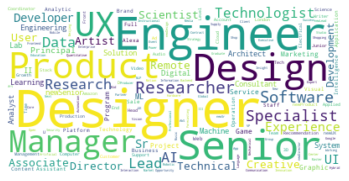

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Creating the text variable
text2 = " ".join(title for title in jobs.title)
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)
# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
words = 'ai|design'
find = jobs['summary'].str.contains(words, case=False, na=False)
jobs[find].sample(5)

,title,company,location,country,working model,salary,summary
9415,Sr. Data Scientist – Sr. Consultant,Guidehouse,"Washington, DC",USA,remote,NaN,The Developer responsible managing complete so...
530,International Special Effects Designer - 3D Di...,Byte Dance,Beijing,China,onsite,NaN,"visual designers, development product business..."
9800,Creative Director,Ouster,San Francisco,USA,onsite,NaN,Proven track record outstanding visual creativ...
7331,"Design Technologist, Brand Innovation Lab",Amazon Advertising LLC,New York,USA,onsite,NaN,Familiar creative ideation brainstorm sessions...
12774,Junior Motion Designer,RUN Studios,NaN,NaN,onsite,NaN,With deep roots video production motion design...


In [25]:
jobs[find].count()

title            8057
company          7817
location         7591
country          7592
working model    8057
salary            184
summary          8057
dtype: int64

In [26]:
jobs[find].describe()

,title,company,location,country,working model,salary,summary
count,8057,7817,7591,7592,8057,184,8057
unique,4155,2303,161,4,3,133,5355
top,Product Designer,Amazon.com Services LLC,Bengaluru,USA,onsite,"₹30,00,000 - ₹40,00,000 a year","work Researcher PM design, develop, deliver......"
freq,176,220,975,5240,6566,8,44


In [27]:
words1 = 'AI.*design|design.*AI'
find1 = jobs['summary'].str.contains(words1, case=False, na=False)
jobs[find1].head(3)

,title,company,location,country,working model,salary,summary
15,QA engineer,Electronic Team,Alexandria,USA,onsite,NaN,"We plan, analyze, design, implement, test, mai..."
30,Sr. Graphic Artist/ Executive Level Presentations,MOSAIC Technologies Group,Annapolis Junction,USA,onsite,NaN,MOSAIC seeking Graphic Artist/ Executive Prese...
172,Design Engineer (Local contract) - ACOEM,NaN,Beijing,China,onsite,NaN,"design general rules, etc… order develop optim..."


In [28]:
jobs[find1].count()

title            723
company          685
location         675
country          675
working model    723
salary            26
summary          723
dtype: int64

In [29]:
jobs[find1]['title'].value_counts()

Product Designer                                                   15
newProduct Designer                                                10
Wireless Power Electromagnetics Design Engineer                    10
Design Technologist, UX, Shopping Design                           10
Graphic Designer                                                    9
                                                                   ..
Graduate Engineer, Building Structures – London – Summer 202...     1
Assistant Mechanical Engineer - Mission Critical (London, UK...     1
Network Operations Engineer, Subsea                                 1
Mobile Engineer                                                     1
newProduct Manager II                                               1
Name: title, Length: 484, dtype: int64

In [50]:
filter1 = jobs['title'].isin(['intelligence designer','Product Designer','AI Interaction Designer','Design Researcher','Design Engineer','Interaction Designer','Conversational AI and VUI Designer','Consultant - Applied Artificial Intelligence','Conversational AI Designer','Senior Product Designer & UX Architect for Revolutionary AI interfaces','Senior UX Designer- Cloud User Experience','User Experience Designer',' Experience Designer','Conversational Designer, Natural Language AI Services','Conversation Designer, Assistant','Design Technologist','Creative Technologist','AI Specialist- Research Scientist','Embedded Optimization Specialist Human-Centered AI',' AI Chatbot Specialist (Build & Conversation Design)','Technical Artist - Metaverse UI/UX Artist','Environment Artist','Digital Strategy Associate','Creative Technologist','Creative Developer'])
jobs[filter1].head(10)

,title,company,location,country,working model,salary,summary
25,Environment Artist,Rockstar Games,Andover,USA,onsite,NaN,"Participate R&D, problem solving artistic solu..."
227,Design Engineer,NaN,Beijing,China,onsite,NaN,"design, aircraft structure design... design, a..."
815,Design Engineer,FBA CONSULTING ENGINEERS,Bengaluru,India,onsite,NaN,Experience - 5-10 years experience.Knowledge R...
816,Design Engineer,FBA CONSULTING ENGINEERS,Bengaluru,India,onsite,NaN,Experience - 5-10 years experience.Knowledge R...
821,User Experience Designer,The MITRE Corporation,Bedford,USA,onsite,NaN,"As user experience designer, you’ll work multi..."
894,Environment Artist,ProbablyMonsters,Bellevue,USA,onsite,NaN,Troubleshoot technical artistic issues maintai...
898,User Experience Designer,Siemens,Bellevue,USA,onsite,NaN,Enhance user experience creating seamless navi...
901,User Experience Designer,Siemens,Bellevue,USA,onsite,NaN,Own research tools channels provide training U...
903,User Experience Designer,Siemens,Bellevue,USA,onsite,NaN,Own research tools channels provide training U...
945,Design Researcher,IBM,Bengaluru,India,onsite,NaN,Visualization critical discovering data-driven...


In [42]:
jobs[filter1].describe()

,title,company,location,country,working model,salary,summary
count,399,397,391,391,399,11,399
unique,11,209,30,4,3,9,269
top,Product Designer,Facebook App,Bengaluru,USA,onsite,"₹15,000 - ₹25,000 a month",Present clients prospects promote InVision’s c...
freq,223,11,78,277,299,2,11
